# Libraries

In [10]:
import os
import pandas as pd
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.anova import AnovaRM
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import tukey_hsd
import matplotlib.pyplot as plt
import pingouin as pg
from pingouin import ancova
from matplotlib.patches import Patch
#import statannotations as sa
from statannotations.Annotator import Annotator
from statannot import add_stat_annotation
import xlsxwriter
import lxml

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from datetime import datetime
from scipy.signal import correlate

# Directories


In [11]:
ROOT = Path().resolve().parent      # one level up from current dir
sleep_df = pd.read_excel(ROOT / "data/Sleep/sleep_results.xlsx")

# Edit the RC file

In [12]:
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "svg.fonttype": "none"
})

# Set Tick Size

In [13]:
sns.set(rc={'axes.linewidth': 2.0})
sns.set_style("white")
sns.set_style("ticks")

# Prep the dataframes

In [14]:
sleep = sleep_df

# Prep the light sleep and wakefulness data

In [15]:
# First of all we test for amplitude difference, with a repeated measure anova

sleep_anova = sleep.drop(['session', 'start_time', 'session_number', 'Start_TR', 'End_TR'], axis=1)

# drop rows, where sleep stadium wasn't properly assigned
sleep_anova_drop = sleep_anova.loc[sleep_anova['sleep_stage'].isin(['1', '2'])]
wake_anova_drop = sleep_anova.loc[sleep_anova['sleep_stage'].isin(['0'])]

sleep_anova_drop['sleep_stage'] = sleep_anova_drop['sleep_stage'].astype(int)
wake_anova_drop['sleep_stage'] = wake_anova_drop['sleep_stage'].astype(int)

# Code sleep stage as categorical variable, so it is not numeric and thus handled categorically rather than calculating linear increase in amplitude, when sleep stage jumps 1 higher
sleep_anova_drop['sleep_stage_letter'] = sleep_anova_drop['sleep_stage'].apply(lambda x: 'a' if x == 1 else ('b' if x == 2 else 'c'))
sleep_anova_drop['partial_volume_amplitude'] = sleep_anova_drop['partial_volume_amplitude'].astype(int)


wake_anova_drop['sleep_stage_letter'] = wake_anova_drop['sleep_stage'].apply(lambda x: 'a' if x == 0 else None)
wake_anova_drop['partial_volume_amplitude'] = wake_anova_drop['partial_volume_amplitude'].astype(int)


# Extract numerical part from 'subID' column
sleep_anova_drop['subID_cat'] = sleep_anova_drop['subID'].str.extract(r'(\d+)')
wake_anova_drop['subID_cat'] = wake_anova_drop['subID'].str.extract(r'(\d+)')
# Convert 'subID_cat' column to numeric type
sleep_anova_drop['subID_cat'] = pd.to_numeric(sleep_anova_drop['subID_cat'])
wake_anova_drop['subID_cat'] = pd.to_numeric(wake_anova_drop['subID_cat'])
#sleep_anova_drop = pd.get_dummies(sleep_anova_drop, columns=['subID_cat'])

/var/folders/ml/8kb9cd2x2yz10lfbvzrvfxy40000gn/T/ipykernel_2624/2253546225.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_anova_drop['sleep_stage'] = sleep_anova_drop['sleep_stage'].astype(int)
/var/folders/ml/8kb9cd2x2yz10lfbvzrvfxy40000gn/T/ipykernel_2624/2253546225.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wake_anova_drop['sleep_stage'] = wake_anova_drop['sleep_stage'].astype(int)
/var/folders/ml/8kb9cd2x2yz10lfbvzrvfxy40000gn/T/ipykernel_2624/2253546225.py:13: SettingWithCopyWarnin

# Cross correlation - wake

# Panel S1A

5     -0.737785
23    -0.398266
28    -0.854469
46    -0.794830
51    -0.291630
         ...   
932   -0.433109
933   -0.536666
934   -0.391135
935   -0.255652
936    0.320639
Name: coupling, Length: 916, dtype: float64
            Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   coupling
No. Observations:     916       Method:               REML    
No. Groups:           33        Scale:                0.0524  
Min. group size:      2         Log-Likelihood:       13.1359 
Max. group size:      62        Converged:            Yes     
Mean group size:      27.8                                    
--------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept          -0.536    0.025 -21.574 0.000 -0.585 -0.488
state_name[T.Wake]  0.106    0.021   5.101 0.000  0.065  0.146
subID Var           0.013    0.019   

/var/folders/ml/8kb9cd2x2yz10lfbvzrvfxy40000gn/T/ipykernel_2624/2679631389.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_anova_drop['sleep_stage'] = sleep_anova_drop['sleep_stage'].astype(int)
/var/folders/ml/8kb9cd2x2yz10lfbvzrvfxy40000gn/T/ipykernel_2624/2679631389.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_anova_drop['sleep_stage_letter'] = sleep_anova_drop['sleep_stage'].apply(lambda x: 'a' if x == 0 else ('b' if x == 1 else ('c' if x == 2 else 'd')))
/var/folders/ml/8kb9cd2x2

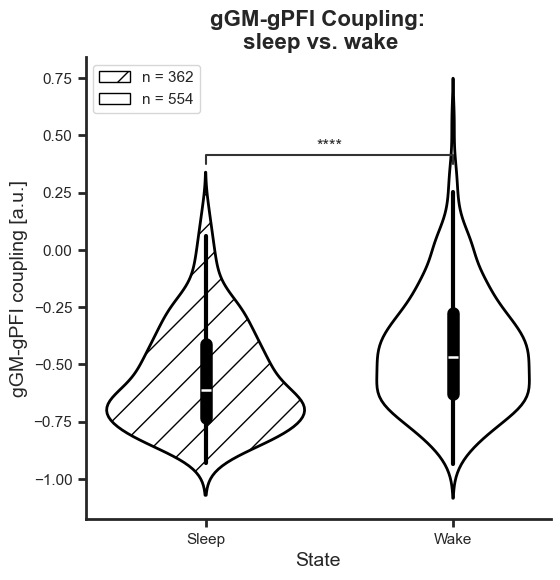

In [ ]:
# First of all we test for amplitude difference, with a repeated measure anova

sleep_anova = sleep.drop(['session', 'start_time', 'session_number', 'Start_TR', 'End_TR'], axis=1)

# drop rows, where sleep stadium wasn't properly assigned
sleep_anova_drop = sleep_anova.loc[sleep_anova['sleep_stage'].isin(['0', '1', '2'])]
sleep_anova_drop['sleep_stage'] = sleep_anova_drop['sleep_stage'].astype(int)
# Code sleep stage as categorical variable, so it is not numeric and thus handled categorically rather than calculating linear increase in amplitude, when sleep stage jumps 1 higher
sleep_anova_drop['sleep_stage_letter'] = sleep_anova_drop['sleep_stage'].apply(lambda x: 'a' if x == 0 else ('b' if x == 1 else ('c' if x == 2 else 'd')))
sleep_anova_drop['coupling'] = sleep_anova_drop['r_ventricle_gm']

# Extract numerical part from 'subID' column
sleep_anova_drop['subID_cat'] = sleep_anova_drop['subID'].str.extract(r'(\d+)')
# Convert 'subID_cat' column to numeric type
sleep_anova_drop['subID_cat'] = pd.to_numeric(sleep_anova_drop['subID_cat'])


sleep_wake = pd.DataFrame()
sleep_wake['coupling'] = pd.concat([sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 1]['coupling'],sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 2]['coupling'],sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 0]['coupling']], axis=0)
sleep_wake['subID'] = pd.concat([sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 1]['subID'],sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 2]['subID'],sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 0]['subID']], axis=0)
# Set values in the second column
sleep_categorical_correlation =  [1] * len(sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 1]) + [1] * len(sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 2]) + [0] * len(sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 0])
sleep_wake['state_categorical'] = sleep_categorical_correlation
sleep_wake['state_name'] = sleep_wake['state_categorical'].apply(lambda x: "Wake" if x == 0 else "Sleep")

print(sleep_wake['coupling'])

fig = plt.figure(figsize=(6, 6))
#ax = sns.violinplot(x="state_name",y='tfi',data=sleep_wake, palette=monokai_pro_palette_tfi, saturation=0.9, linewidth=2, inner="box", fill=False)
ax = sns.violinplot(x="state_name",y='coupling',data=sleep_wake, color='black', saturation=0.9, linewidth=2, inner="box", fill=False)
ax.tick_params(axis='x', which='both', direction='out', width=2)  # Adjust the width as needed
ax.tick_params(axis='y', which='both', direction='out', width=2)  # Adjust the width as needed
sns.despine()  # Adjust spines

for i, violin in enumerate(ax.collections):
    if i == 0:  # Apply pattern to the first violin
        violin.set_hatch('/')  # Apply hatch pattern

# Do a ttest and correct for multiple measures

md = smf.mixedlm("coupling ~ state_name", sleep_wake, groups='subID')
mdf = md.fit()
print(mdf.summary())





# Get the current axis
ax = plt.gca()

# Add statistical annotations
plotting_parameters = {
            'data':    sleep_wake,
            'x':       'state_name',
            'y':       'coupling',
            #'y':       'tfi',
            #'hue':     'subID'
        }

         
         
pairs = [('Sleep', 'Wake')]       

# Extract p-value
pvalue = mdf.pvalues['state_name[T.Wake]']
print(pvalue)

# Initialize an empty list to store formatted p-values
formatted_pvalues_list = []

# Format p-value
if pvalue <= 1e-4:
    formatted_pvalue = '****'
elif pvalue <= 1e-3:
    formatted_pvalue = '***'
elif pvalue <= 1e-2:
    formatted_pvalue = '**'
elif pvalue <= 5e-2:
    formatted_pvalue = '*'
else:
    formatted_pvalue = 'ns'
    
# Convert single p-value to a list
formatted_pvalues_list = [formatted_pvalue]


# Set custom annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.set_custom_annotations(formatted_pvalues_list)
annotator.annotate()

# Coupling Gruppe - Annot
plt.title(f'gGM-gPFI Coupling:\n sleep vs. wake',fontsize = 16, weight = 'bold')
plt.xlabel('State', fontsize = 14)
plt.ylabel('gGM-gPFI coupling [a.u.]', fontsize = 14)


# new way:
legend_patches = [
    Patch(facecolor='white',edgecolor='black', hatch='/', label=f'n = {len(sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 1]) + len(sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 2])}'),
    Patch(facecolor='white',edgecolor='black', label=f'n = {len(sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 0])}')
]

# Add legend with custom patches
ax.legend(handles=legend_patches, loc='upper left')

# Save the figure -------
#image_path = os.path.join(outDir, f'Difference in gGM-gPFI coupling different states normalized.png')
#fig.savefig(image_path,dpi=600)
#---
#image_path_svg = os.path.join(outDir, 'Difference in gGM-gPFI coupling different states normalized.svg')
#fig.savefig(image_path_svg)

# Panel S1B

5      0.436188
23     0.330524
28     0.726927
46     0.510737
51     0.122762
         ...   
932    0.497772
933    0.710720
934    0.604732
935    0.567782
936    0.351268
Name: coupling, Length: 916, dtype: float64
            Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   coupling
No. Observations:    916       Method:               REML    
No. Groups:          33        Scale:                0.0365  
Min. group size:     2         Log-Likelihood:       173.8046
Max. group size:     62        Converged:            Yes     
Mean group size:     27.8                                    
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           0.440    0.024 18.360 0.000  0.393  0.486
state_name[T.Wake] -0.055    0.018 -3.125 0.002 -0.089 -0.020
subID Var           0.014    0.024              

/var/folders/ml/8kb9cd2x2yz10lfbvzrvfxy40000gn/T/ipykernel_2624/3638296514.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_anova_drop['sleep_stage'] = sleep_anova_drop['sleep_stage'].astype(int)
/var/folders/ml/8kb9cd2x2yz10lfbvzrvfxy40000gn/T/ipykernel_2624/3638296514.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_anova_drop['sleep_stage_letter'] = sleep_anova_drop['sleep_stage'].apply(lambda x: 'a' if x == 0 else ('b' if x == 1 else ('c' if x == 2 else 'd')))
/var/folders/ml/8kb9cd2x2

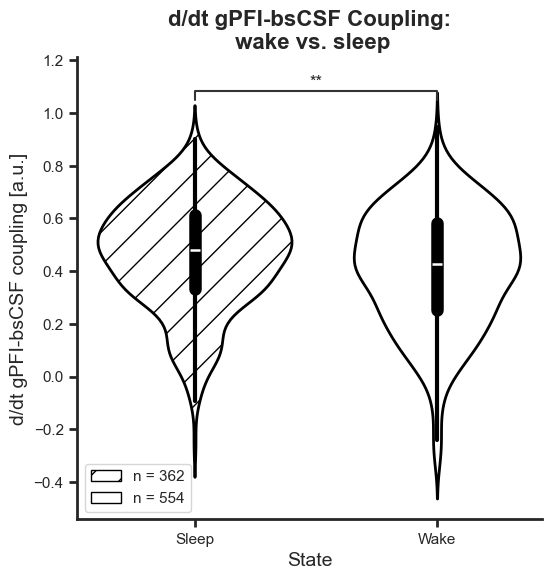

In [18]:
# First of all we test for amplitude difference, with a repeated measure anova

sleep_anova = sleep.drop(['session', 'start_time', 'session_number', 'Start_TR', 'End_TR'], axis=1)

# drop rows, where sleep stadium wasn't properly assigned
sleep_anova_drop = sleep_anova.loc[sleep_anova['sleep_stage'].isin(['0', '1', '2'])]
sleep_anova_drop['sleep_stage'] = sleep_anova_drop['sleep_stage'].astype(int)
# Code sleep stage as categorical variable, so it is not numeric and thus handled categorically rather than calculating linear increase in amplitude, when sleep stage jumps 1 higher
sleep_anova_drop['sleep_stage_letter'] = sleep_anova_drop['sleep_stage'].apply(lambda x: 'a' if x == 0 else ('b' if x == 1 else ('c' if x == 2 else 'd')))
sleep_anova_drop['coupling'] = sleep_anova_drop['r_ventricle_csf']

# Extract numerical part from 'subID' column
sleep_anova_drop['subID_cat'] = sleep_anova_drop['subID'].str.extract(r'(\d+)')
# Convert 'subID_cat' column to numeric type
sleep_anova_drop['subID_cat'] = pd.to_numeric(sleep_anova_drop['subID_cat'])



sleep_wake = pd.DataFrame()
sleep_wake['coupling'] = pd.concat([sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 1]['coupling'],sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 2]['coupling'], sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 0]['coupling']], axis=0)
sleep_wake['subID'] = pd.concat([sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 1]['subID'],sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 2]['subID'], sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 0]['subID']], axis=0)
# Set values in the second column
sleep_categorical_correlation = [1] * len(sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 1]) + [1] * len(sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 2]) + [0] * len(sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 0])
sleep_wake['state_categorical'] = sleep_categorical_correlation
sleep_wake['state_name'] = sleep_wake['state_categorical'].apply(lambda x: "Wake" if x == 0 else "Sleep")

print(sleep_wake['coupling'])

fig = plt.figure(figsize=(6, 6))
#ax = sns.violinplot(x="state_name",y='tfi',data=sleep_wake, palette=monokai_pro_palette_tfi, saturation=0.9, linewidth=2, inner="box", fill=False)
ax = sns.violinplot(x="state_name",y='coupling',data=sleep_wake, color='black', saturation=0.9, linewidth=2, inner="box", fill=False)
ax.tick_params(axis='x', which='both', direction='out', width=2)  # Adjust the width as needed
ax.tick_params(axis='y', which='both', direction='out', width=2)  # Adjust the width as needed
sns.despine()  # Adjust spines

for i, violin in enumerate(ax.collections):
    if i == 0:  # Apply pattern to the first violin
        violin.set_hatch('/')  # Apply hatch pattern

# Do a ttest and correct for multiple measures


md = smf.mixedlm("coupling ~ state_name", sleep_wake, groups='subID')
mdf = md.fit()
print(mdf.summary())





# Get the current axis
ax = plt.gca()

# Add statistical annotations
plotting_parameters = {
            'data':    sleep_wake,
            'x':       'state_name',
            'y':       'coupling',
            #'y':       'tfi',
            #'hue':     'subID'
        }

         
         
pairs = [('Sleep', 'Wake')]       

# Extract p-value
pvalue = mdf.pvalues['state_name[T.Wake]']
print(pvalue)

# Initialize an empty list to store formatted p-values
formatted_pvalues_list = []

# Format p-value
if pvalue <= 1e-4:
    formatted_pvalue = '****'
elif pvalue <= 1e-3:
    formatted_pvalue = '***'
elif pvalue <= 1e-2:
    formatted_pvalue = '**'
elif pvalue <= 5e-2:
    formatted_pvalue = '*'
else:
    formatted_pvalue = 'ns'
    
# Convert single p-value to a list
formatted_pvalues_list = [formatted_pvalue]


# Set custom annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.set_custom_annotations(formatted_pvalues_list)
annotator.annotate()

# Coupling Gruppe - Annot
plt.title(f'd/dt gPFI-bsCSF Coupling:\n wake vs. sleep',fontsize = 16, weight = 'bold')
plt.xlabel('State', fontsize = 14)
plt.ylabel('d/dt gPFI-bsCSF coupling [a.u.]', fontsize = 14)
#annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalue)
#annotator.set_pvalues_and_annotate(pvalues)

# old way
#colors = [artist.get_facecolor() for artist in ax.collections]
#legend_patches = [Patch(color=colors[0]), Patch(color=colors[2])]
#legend_labels = [f"n = {len(sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 0])}",f"n = {len(sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 1]) + len(sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 2])}"]
#ax.legend(legend_patches, legend_labels, loc='upper left')

# new way:
legend_patches = [
    Patch(facecolor='white',edgecolor='black', hatch='/', label=f'n = {len(sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 1]) + len(sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 2])}'),
    Patch(facecolor='white',edgecolor='black', label=f'n = {len(sleep_anova_drop[sleep_anova_drop['sleep_stage'] == 0])}')
]

# Add legend with custom patches
ax.legend(handles=legend_patches, loc='lower left')

# Save the figure -------
#image_path = os.path.join(outDir, f'Difference in gPFI-bsCSF coupling different states normalized.png')
#fig.savefig(image_path,dpi=600)
#---
#image_path_svg = os.path.join(outDir, 'Difference in gPFI-bsCSF coupling different states normalized.svg')
#fig.savefig(image_path_svg)